# Min Max Algorithm

In [1]:
pip install treelib

You should consider upgrading via the 'c:\users\satyanarayana\appdata\local\programs\python\python37-32\python.exe -m pip install --upgrade pip' command.


In [11]:
from treelib import Node, Tree

tree = Tree()
tree.create_node("root", "root")
tree.create_node("", "l1", parent='root')
tree.create_node("", "r1", parent='root')
tree.create_node("3", "l1-1", parent='l1')
tree.create_node("5", "l1-2", parent='l1')
tree.create_node("2", "r1-1", parent='r1')
tree.create_node("9", "r1-2", parent='r1')
tree
tree.show()

root
├── 
│   ├── 3
│   └── 5
└── 
    ├── 2
    └── 9



In [12]:
def minmax(tree, current_id, is_max):
    '''
    tree: tree object to minmax over
    current_id: current_id where we are in the tree
    is_max: are we the maximizing player?
    '''
    if tree.depth(current_id) == tree.depth():             # If this holds, we are at the end of the tree
        return int(tree[current_id].tag)                   # return the value at the end of tree so it propagates up the tree
    children_of_current_id = tree.children(current_id)     # Determine the children of the current node
    scores = [minmax(tree, child.identifier, not is_max) for child in children_of_current_id]   # Recursively run this function on each of the children
    if is_max:                                             # Return the appropriate score for the max or min player  
        return max(scores)
    else:
        return min(scores)

minmax(tree, 'root', True)

3

create a Python class to store the state, allow updates to the board, check if the game is done, and return the value of our game depending on the outcome

In [13]:
import numpy as np

class Tictoe:
    def __init__(self, size):
        self.size = size
        self.board = np.zeros(size*size)
        self.letters_to_move = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'][:size*size]
    def get_board(self):
        return self.board.reshape([self.size, self.size])
    def make_move(self, who, where, verbose=False):
        self.board[self.letters_to_move.index(where)] = who
    def get_sums_of_board(self):
        local_board = self.get_board()
        return np.concatenate([local_board.sum(axis=0),             # columns
                               local_board.sum(axis=1),             # rows
                               np.trace(local_board),               # diagonal
                               np.trace(np.fliplr(local_board))], axis=None)   # other diagonal
    def is_endstate(self):
        someone_won = len(np.intersect1d((self.size, -self.size), self.get_sums_of_board())) > 0
        draw = np.count_nonzero(self.board) == self.size * self.size
        return someone_won or draw
    def get_value(self):
        sums = self.get_sums_of_board()
        if self.size in sums:
            return 10 - np.count_nonzero(self.board)   # Punish longer games
        elif -self.size in sums:
            return -10 + np.count_nonzero(self.board)
        else:
            return 0

next we recursively create the giant tree and add the board state object at each node. The ID of each node is the sequence of steps taken

In [14]:
import copy

def remove_value_list(l, val):
    return [el for el in l if el != val]

flip_player = {1: -1, -1: 1}

possible_options = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

def add_options_to_node(tree, node, tt_data, player, remaining_options):
    for option in remaining_options:
        local_tt_data = copy.deepcopy(tt_data)           # To prevent changing these values in other branches of the tree
        local_tt_data.make_move(player, option, False)
        if node.identifier != 'root':
            new_identifier = node.identifier + option
        else:
            new_identifier = option
        tree.create_node(option, new_identifier, node.identifier, data = local_tt_data)
        if len(remaining_options) > 1 and not local_tt_data.is_endstate():  # At end of the game, stop adding nodes
            add_options_to_node(tree, tree[new_identifier], local_tt_data, 
                                flip_player[player], remove_value_list(remaining_options, option))
    return None

TicToe_state = Tictoe(3)
TicToe_3x3 = Tree()
TicToe_3x3.create_node("root", "root")
add_options_to_node(TicToe_3x3, TicToe_3x3["root"], 
                    TicToe_state, 1, possible_options)

With the tree done, we can use minimax code very similar to the simple tree we first started with

In [15]:
def minmax_tt(tree, current_id, is_max):
    current_node = tree[current_id]                     # Find the tree element we are now
    if current_node.data.is_endstate():                 # Are we at the end of the game?
        return current_node.data.get_value()            # Return the value
    children_of_current_id = tree.children(current_id)  # Determine the children
    scores = [minmax_tt(tree, child.identifier, not is_max) for child in children_of_current_id]   # Recursively run this function on each of the children
    if is_max:                                          # Return the max or min score depending on which player we are
        return max(scores)
    else:
        return min(scores)
    
def determine_move(tree, current_id, is_max):
    '''
    Given a state on the board, what is the best next move? 
    '''
    potential_moves = tree.children(current_id)
    moves = [child.identifier[-1] for child in potential_moves]
    raw_scores = np.array([minmax_tt(tree, child.identifier, not is_max) for child in potential_moves])
    if is_max:
        return moves[random.choice(np.where(raw_scores == max(raw_scores))[0])]
    else:
        return moves[random.choice(np.where(raw_scores == min(raw_scores))[0])]

Using determine_move we can now get the next best move. Note that in case multiple moves have the same max value, we choose a random move here amongst those max moves. For example, when the max player plays the a square:

In [16]:
import time
import random

start = time.time()
print(determine_move(TicToe_3x3, 'a', is_max=False))
print(time.time()-start)

e
5.020823240280151


In [9]:
tictactoe = Tictoe(3)

print('''Welcome to TicTacToe. 

You can make a move by selecting one of the following letters:''')
print(np.array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']).reshape(3,3))
print('''You start, the computer will take the next move

Initial board:''')

move_history = ''
while not tictactoe.is_endstate():
    player_move = input('Your move!: ')
    tictactoe.make_move(1, player_move)
    print(tictactoe.get_board())
    move_history += player_move
    if tictactoe.is_endstate():
        print('You won!...wait you won?????')
    
    print('Computer is thinking')
    computer_move = determine_move(TicToe_3x3, move_history, False)
    tictactoe.make_move(-1, computer_move)
    print(tictactoe.get_board())
    move_history += computer_move
    if tictactoe.is_endstate():
        print('Computer won!')
        
    if len(move_history) >= 8 and not tictactoe.is_endstate():
        print('Draw...')
        break

Welcome to TicTacToe. 

You can make a move by selecting one of the following letters:
[['a' 'b' 'c']
 ['d' 'e' 'f']
 ['g' 'h' 'i']]
You start, the computer will take the next move

Initial board:
Your move!: e
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
Computer is thinking
[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0. -1.]]
Your move!: b
[[ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0. -1.]]
Computer is thinking
[[ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0. -1. -1.]]
Your move!: g
[[ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 1. -1. -1.]]
Computer is thinking
[[ 0.  1. -1.]
 [ 0.  1.  0.]
 [ 1. -1. -1.]]
Your move!: f
[[ 0.  1. -1.]
 [ 0.  1.  1.]
 [ 1. -1. -1.]]
Computer is thinking
[[ 0.  1. -1.]
 [-1.  1.  1.]
 [ 1. -1. -1.]]
Draw...


In [20]:
from math import inf as infinity
from random import choice
import platform
import time
from os import system

"""
An implementation of Minimax AI Algorithm in Tic Tac Toe,
using Python.
This software is available under GPL license.
Author: Clederson Cruz
Year: 2017
License: GNU GENERAL PUBLIC LICENSE (GPL)
"""

HUMAN = -1
COMP = +1
board = [
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0],
]


def evaluate(state):
    """
    Function to heuristic evaluation of state.
    :param state: the state of the current board
    :return: +1 if the computer wins; -1 if the human wins; 0 draw
    """
    if wins(state, COMP):
        score = +1
    elif wins(state, HUMAN):
        score = -1
    else:
        score = 0

    return score


def wins(state, player):
    """
    This function tests if a specific player wins. Possibilities:
    * Three rows    [X X X] or [O O O]
    * Three cols    [X X X] or [O O O]
    * Two diagonals [X X X] or [O O O]
    :param state: the state of the current board
    :param player: a human or a computer
    :return: True if the player wins
    """
    win_state = [
        [state[0][0], state[0][1], state[0][2]],
        [state[1][0], state[1][1], state[1][2]],
        [state[2][0], state[2][1], state[2][2]],
        [state[0][0], state[1][0], state[2][0]],
        [state[0][1], state[1][1], state[2][1]],
        [state[0][2], state[1][2], state[2][2]],
        [state[0][0], state[1][1], state[2][2]],
        [state[2][0], state[1][1], state[0][2]],
    ]
    if [player, player, player] in win_state:
        return True
    else:
        return False


def game_over(state):
    """
    This function test if the human or computer wins
    :param state: the state of the current board
    :return: True if the human or computer wins
    """
    return wins(state, HUMAN) or wins(state, COMP)


def empty_cells(state):
    """
    Each empty cell will be added into cells' list
    :param state: the state of the current board
    :return: a list of empty cells
    """
    cells = []

    for x, row in enumerate(state):
        for y, cell in enumerate(row):
            if cell == 0:
                cells.append([x, y])

    return cells


def valid_move(x, y):
    """
    A move is valid if the chosen cell is empty
    :param x: X coordinate
    :param y: Y coordinate
    :return: True if the board[x][y] is empty
    """
    if [x, y] in empty_cells(board):
        return True
    else:
        return False


def set_move(x, y, player):
    """
    Set the move on board, if the coordinates are valid
    :param x: X coordinate
    :param y: Y coordinate
    :param player: the current player
    """
    if valid_move(x, y):
        board[x][y] = player
        return True
    else:
        return False


def minimax(state, depth, player):
    """
    AI function that choice the best move
    :param state: current state of the board
    :param depth: node index in the tree (0 <= depth <= 9),
    but never nine in this case (see iaturn() function)
    :param player: an human or a computer
    :return: a list with [the best row, best col, best score]
    """
    if player == COMP:
        best = [-1, -1, -infinity]
    else:
        best = [-1, -1, +infinity]

    if depth == 0 or game_over(state):
        score = evaluate(state)
        return [-1, -1, score]

    for cell in empty_cells(state):
        x, y = cell[0], cell[1]
        state[x][y] = player
        score = minimax(state, depth - 1, -player)
        state[x][y] = 0
        score[0], score[1] = x, y

        if player == COMP:
            if score[2] > best[2]:
                best = score  # max value
        else:
            if score[2] < best[2]:
                best = score  # min value

    return best


def clean():
    """
    Clears the console
    """
    os_name = platform.system().lower()
    if 'windows' in os_name:
        system('cls')
    else:
        system('clear')


def render(state, c_choice, h_choice):
    """
    Print the board on console
    :param state: current state of the board
    """

    chars = {
        -1: h_choice,
        +1: c_choice,
        0: ' '
    }
    str_line = '---------------'

    print('\n' + str_line)
    for row in state:
        for cell in row:
            symbol = chars[cell]
            print(f'| {symbol} |', end='')
        print('\n' + str_line)


def ai_turn(c_choice, h_choice):
    """
    It calls the minimax function if the depth < 9,
    else it choices a random coordinate.
    :param c_choice: computer's choice X or O
    :param h_choice: human's choice X or O
    :return:
    """
    depth = len(empty_cells(board))
    if depth == 0 or game_over(board):
        return

    clean()
    print(f'Computer turn [{c_choice}]')
    render(board, c_choice, h_choice)

    if depth == 9:
        x = choice([0, 1, 2])
        y = choice([0, 1, 2])
    else:
        move = minimax(board, depth, COMP)
        x, y = move[0], move[1]

    set_move(x, y, COMP)
    time.sleep(1)


def human_turn(c_choice, h_choice):
    """
    The Human plays choosing a valid move.
    :param c_choice: computer's choice X or O
    :param h_choice: human's choice X or O
    :return:
    """
    depth = len(empty_cells(board))
    if depth == 0 or game_over(board):
        return

    # Dictionary of valid moves
    move = -1
    moves = {
        1: [0, 0], 2: [0, 1], 3: [0, 2],
        4: [1, 0], 5: [1, 1], 6: [1, 2],
        7: [2, 0], 8: [2, 1], 9: [2, 2],
    }

    clean()
    print(f'Human turn [{h_choice}]')
    render(board, c_choice, h_choice)

    while move < 1 or move > 9:
        try:
            move = int(input('Use numpad (1..9): '))
            coord = moves[move]
            can_move = set_move(coord[0], coord[1], HUMAN)

            if not can_move:
                print('Bad move')
                move = -1
        except (EOFError, KeyboardInterrupt):
            print('Bye')
            exit()
        except (KeyError, ValueError):
            print('Bad choice')


def main():
    """
    Main function that calls all functions
    """
    clean()
    h_choice = ''  # X or O
    c_choice = ''  # X or O
    first = ''  # if human is the first

    # Human chooses X or O to play
    while h_choice != 'O' and h_choice != 'X':
        try:
            print('')
            h_choice = input('Choose X or O\nChosen: ').upper()
        except (EOFError, KeyboardInterrupt):
            print('Bye')
            exit()
        except (KeyError, ValueError):
            print('Bad choice')

    # Setting computer's choice
    if h_choice == 'X':
        c_choice = 'O'
    else:
        c_choice = 'X'

    # Human may starts first
    clean()
    while first != 'Y' and first != 'N':
        try:
            first = input('First to start?[y/n]: ').upper()
        except (EOFError, KeyboardInterrupt):
            print('Bye')
            exit()
        except (KeyError, ValueError):
            print('Bad choice')

    # Main loop of this game
    while len(empty_cells(board)) > 0 and not game_over(board):
        if first == 'N':
            ai_turn(c_choice, h_choice)
            first = ''

        human_turn(c_choice, h_choice)
        ai_turn(c_choice, h_choice)

    # Game over message
    if wins(board, HUMAN):
        clean()
        print(f'Human turn [{h_choice}]')
        render(board, c_choice, h_choice)
        print('YOU WIN!')
    elif wins(board, COMP):
        clean()
        print(f'Computer turn [{c_choice}]')
        render(board, c_choice, h_choice)
        print('YOU LOSE!')
    else:
        clean()
        render(board, c_choice, h_choice)
        print('DRAW!')

    exit()


if __name__ == '__main__':
    main()


Choose X or O
Chosen: 1

Choose X or O
Chosen: 2

Choose X or O
Chosen: 3

Choose X or O
Chosen: X
First to start?[y/n]: N
Computer turn [O]

---------------
|   ||   ||   |
---------------
|   ||   ||   |
---------------
|   ||   ||   |
---------------
Human turn [X]

---------------
|   ||   ||   |
---------------
|   ||   || O |
---------------
|   ||   ||   |
---------------
Use numpad (1..9): 3
Computer turn [O]

---------------
|   ||   || X |
---------------
|   ||   || O |
---------------
|   ||   ||   |
---------------
Human turn [X]

---------------
| O ||   || X |
---------------
|   ||   || O |
---------------
|   ||   ||   |
---------------
Use numpad (1..9): 5
Computer turn [O]

---------------
| O ||   || X |
---------------
|   || X || O |
---------------
|   ||   ||   |
---------------
Human turn [X]

---------------
| O ||   || X |
---------------
|   || X || O |
---------------
| O ||   ||   |
---------------
Use numpad (1..9): 4
Computer turn [O]

---------------
|

# Alpha Beta Pruning

In [22]:
from random import choice
from math import inf

board = [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]

def Gameboard(board):
    chars = {1: 'X', -1: 'O', 0: ' '}
    for x in board:
        for y in x:
            ch = chars[y]
            print(f'| {ch} |', end='')
        print('\n' + '---------------')
    print('===============')

def Clearboard(board):
    for x, row in enumerate(board):
        for y, col in enumerate(row):
            board[x][y] = 0

def winningPlayer(board, player):
    conditions = [[board[0][0], board[0][1], board[0][2]],
                     [board[1][0], board[1][1], board[1][2]],
                     [board[2][0], board[2][1], board[2][2]],
                     [board[0][0], board[1][0], board[2][0]],
                     [board[0][1], board[1][1], board[2][1]],
                     [board[0][2], board[1][2], board[2][2]],
                     [board[0][0], board[1][1], board[2][2]],
                     [board[0][2], board[1][1], board[2][0]]]

    if [player, player, player] in conditions:
        return True

    return False

def gameWon(board):
    return winningPlayer(board, 1) or winningPlayer(board, -1)

def printResult(board):
    if winningPlayer(board, 1):
        print('X has won! ' + '\n')

    elif winningPlayer(board, -1):
        print('O\'s have won! ' + '\n')

    else:
        print('Draw' + '\n')

def blanks(board):
    blank = []
    for x, row in enumerate(board):
        for y, col in enumerate(row):
            if board[x][y] == 0:
                blank.append([x, y])

    return blank

def boardFull(board):
    if len(blanks(board)) == 0:
        return True
    return False

def setMove(board, x, y, player):
    board[x][y] = player

def playerMove(board):
    e = True
    moves = {1: [0, 0], 2: [0, 1], 3: [0, 2],
             4: [1, 0], 5: [1, 1], 6: [1, 2],
             7: [2, 0], 8: [2, 1], 9: [2, 2]}
    while e:
        try:
            move = int(input('Enter a number between 1-9: '))
            if move < 1 or move > 9:
                print('Invalid Move! Try again!')
            elif not (moves[move] in blanks(board)):
                print('Invalid Move! Try again!')
            else:
                setMove(board, moves[move][0], moves[move][1], 1)
                Gameboard(board)
                e = False
        except(KeyError, ValueError):
            print('Enter a number!')

def getScore(board):
    if winningPlayer(board, 1):
        return 10

    elif winningPlayer(board, -1):
        return -10

    else:
        return 0

def abminimax(board, depth, alpha, beta, player):
    row = -1
    col = -1
    if depth == 0 or gameWon(board):
        return [row, col, getScore(board)]

    else:
        for cell in blanks(board):
            setMove(board, cell[0], cell[1], player)
            score = abminimax(board, depth - 1, alpha, beta, -player)
            if player == 1:
                # X is always the max player
                if score[2] > alpha:
                    alpha = score[2]
                    row = cell[0]
                    col = cell[1]

            else:
                if score[2] < beta:
                    beta = score[2]
                    row = cell[0]
                    col = cell[1]

            setMove(board, cell[0], cell[1], 0)

            if alpha >= beta:
                break

        if player == 1:
            return [row, col, alpha]

        else:
            return [row, col, beta]

def o_comp(board):
    if len(blanks(board)) == 9:
        x = choice([0, 1, 2])
        y = choice([0, 1, 2])
        setMove(board, x, y, -1)
        Gameboard(board)

    else:
        result = abminimax(board, len(blanks(board)), -inf, inf, -1)
        setMove(board, result[0], result[1], -1)
        Gameboard(board)

def x_comp(board):
    if len(blanks(board)) == 9:
        x = choice([0, 1, 2])
        y = choice([0, 1, 2])
        setMove(board, x, y, 1)
        Gameboard(board)

    else:
        result = abminimax(board, len(blanks(board)), -inf, inf, 1)
        setMove(board, result[0], result[1], 1)
        Gameboard(board)

def makeMove(board, player, mode):
    if mode == 1:
        if player == 1:
            playerMove(board)

        else:
            o_comp(board)
    else:
        if player == 1:
            o_comp(board)
        else:
            x_comp(board)

def pvc():
    while True:
        try:
            order = int(input('Enter to play 1st or 2nd: '))
            if not (order == 1 or order == 2):
                print('Please pick 1 or 2')
            else:
                break
        except(KeyError, ValueError):
            print('Enter a number')

    Clearboard(board)
    if order == 2:
        currentPlayer = -1
    else:
        currentPlayer = 1

    while not (boardFull(board) or gameWon(board)):
        makeMove(board, currentPlayer, 1)
        currentPlayer *= -1

    printResult(board)

# Driver Code
print("=================================================")
print("TIC-TAC-TOE using MINIMAX with ALPHA-BETA Pruning")
print("=================================================")
pvc()

TIC-TAC-TOE using MINIMAX with ALPHA-BETA Pruning
Enter to play 1st or 2nd: 1
Enter a number between 1-9: 2
|   || X ||   |
---------------
|   ||   ||   |
---------------
|   ||   ||   |
---------------
| O || X ||   |
---------------
|   ||   ||   |
---------------
|   ||   ||   |
---------------
Enter a number between 1-9: 4
| O || X ||   |
---------------
| X ||   ||   |
---------------
|   ||   ||   |
---------------
| O || X ||   |
---------------
| X || O ||   |
---------------
|   ||   ||   |
---------------
Enter a number between 1-9: 9
| O || X ||   |
---------------
| X || O ||   |
---------------
|   ||   || X |
---------------
| O || X || O |
---------------
| X || O ||   |
---------------
|   ||   || X |
---------------
Enter a number between 1-9: 7
| O || X || O |
---------------
| X || O ||   |
---------------
| X ||   || X |
---------------
| O || X || O |
---------------
| X || O ||   |
---------------
| X || O || X |
---------------
Enter a number between 1-9: 6
| O 

In [12]:
from random import choice
from math import inf

board = [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]

def Gameboard(board):
    chars = {1: 'X', -1: 'O', 0: ' '}
    for x in board:
        for y in x:
            ch = chars[y]
            print(f'| {ch} |', end='')
        print('\n' + '---------------')
    print('===============')

def Clearboard(board):
    for x, row in enumerate(board):
        for y, col in enumerate(row):
            board[x][y] = 0

def winningPlayer(board, player):
    conditions = [[board[0][0], board[0][1], board[0][2]],
                     [board[1][0], board[1][1], board[1][2]],
                     [board[2][0], board[2][1], board[2][2]],
                     [board[0][0], board[1][0], board[2][0]],
                     [board[0][1], board[1][1], board[2][1]],
                     [board[0][2], board[1][2], board[2][2]],
                     [board[0][0], board[1][1], board[2][2]],
                     [board[0][2], board[1][1], board[2][0]]]

    if [player, player, player] in conditions:
        return True

    return False

def gameWon(board):
    return winningPlayer(board, 1) or winningPlayer(board, -1)

def printResult(board):
    if winningPlayer(board, 1):
        print('X has won!, Min Max  ' + '\n')

    elif winningPlayer(board, -1):
        print('O\'s have won!, Alpha Beta Pruning  ' + '\n')

    else:
        print('Draw' + '\n')

def blanks(board):
    blank = []
    for x, row in enumerate(board):
        for y, col in enumerate(row):
            if board[x][y] == 0:
                blank.append([x, y])

    return blank

def boardFull(board):
    if len(blanks(board)) == 0:
        return True
    return False

def setMove(board, x, y, player):
    board[x][y] = player

def playerMove(board):
    e = True
    moves = {1: [0, 0], 2: [0, 1], 3: [0, 2],
             4: [1, 0], 5: [1, 1], 6: [1, 2],
             7: [2, 0], 8: [2, 1], 9: [2, 2]}
    while e:
        try:
            move = int(input('Enter a number between 1-9: '))
            if move < 1 or move > 9:
                print('Invalid Move! Try again!')
            elif not (moves[move] in blanks(board)):
                print('Invalid Move! Try again!')
            else:
                setMove(board, moves[move][0], moves[move][1], 1)
                Gameboard(board)
                e = False
        except(KeyError, ValueError):
            print('Enter a number!')

def getScore(board):
    if winningPlayer(board, 1):
        return 10

    elif winningPlayer(board, -1):
        return -10

    else:
        return 0
    
def minimax(state, depth, player):
    """
    AI function that choice the best move
    :param state: current state of the board
    :param depth: node index in the tree (0 <= depth <= 9),
    but never nine in this case (see iaturn() function)
    :param player: an human or a computer
    :return: a list with [the best row, best col, best score]
    """
    if player == -1:
        best = [-1, -1, -10000000]
    else:
        best = [-1, -1, +10000000]

    if depth == 0 or gameWon(state):
        score = getScore(state)
        return [-1, -1, score]

    for cell in blanks(state):
        x, y = cell[0], cell[1]
        state[x][y] = player
        score = minimax(state, depth - 1, -player)
        state[x][y] = 0
        score[0], score[1] = x, y

        if player == -1:
            if score[2] > best[2]:
                best = score  # max value
        else:
            if score[2] < best[2]:
                best = score  # min value

    return best

def abminimax(board, depth, alpha, beta, player):
    row = -1
    col = -1
    if depth == 0 or gameWon(board):
        return [row, col, getScore(board)]

    else:
        for cell in blanks(board):
            setMove(board, cell[0], cell[1], player)
            score = abminimax(board, depth - 1, alpha, beta, -player)
            if player == 1:
                # X is always the max player
                if score[2] > alpha:
                    alpha = score[2]
                    row = cell[0]
                    col = cell[1]

            else:
                if score[2] < beta:
                    beta = score[2]
                    row = cell[0]
                    col = cell[1]

            setMove(board, cell[0], cell[1], 0)

            if alpha >= beta:
                break

        if player == 1:
            return [row, col, alpha]

        else:
            return [row, col, beta]

def o_comp(board):
    if len(blanks(board)) == 9:
        #x = choice([0, 1, 2])
        #y = choice([0, 1, 2])
        move = minimax(board, len(blanks(board)), +1)
        x, y = move[0], move[1]
        setMove(board, x, y, -1)
        Gameboard(board)

    else:
        result = abminimax(board, len(blanks(board)), -inf, inf, -1)
        setMove(board, result[0], result[1], -1)
        Gameboard(board)

def x_comp(board):
    if len(blanks(board)) == 9:
        #x = choice([0, 1, 2])
        #y = choice([0, 1, 2])
        move = minimax(board, len(blanks(board)), +1)
        x, y = move[0], move[1]
        setMove(board, x, y, 1)
        Gameboard(board)

    else:
        result = abminimax(board, len(blanks(board)), -inf, inf, 1)
        setMove(board, result[0], result[1], 1)
        Gameboard(board)

def makeMove(board, player, mode):
    if mode == 1:
        if player == 1:
            minimax(board,len(blanks(board)),player)

        else:
            o_comp(board)
    else:
        if player == 1:
            o_comp(board)
        else:
            x_comp(board)

def pvc():
    currentPlayer = 1
    """while True:
        try:
            order = int(input('Enter to play 1st or 2nd: '))
            if not (order == 1 or order == 2):
                print('Please pick 1 or 2')
            else:
                break
        except(KeyError, ValueError):
            print('Enter a number')

    Clearboard(board)
    if order == 2:
        currentPlayer = -1
    else:
        currentPlayer = 1"""

    while not (boardFull(board) or gameWon(board)):
        makeMove(board, currentPlayer, 1)
        currentPlayer *= -1
        makeMove(board, currentPlayer, -1)
        currentPlayer *= 1

    printResult(board)

# Driver Code
print("=================================================")
print("TIC-TAC-TOE using MINIMAX with MIN MAX OVER ALPHA-BETA Pruning")
print("=================================================")
pvc()  


TIC-TAC-TOE using MINIMAX with MIN MAX OVER ALPHA-BETA Pruning
|   ||   ||   |
---------------
|   || X ||   |
---------------
|   ||   ||   |
---------------
| O ||   ||   |
---------------
|   || X ||   |
---------------
|   ||   ||   |
---------------
| O || O ||   |
---------------
|   || X ||   |
---------------
|   ||   ||   |
---------------
| O || O || X |
---------------
|   || X ||   |
---------------
|   ||   ||   |
---------------
| O || O || X |
---------------
|   || X ||   |
---------------
| O ||   ||   |
---------------
| O || O || X |
---------------
| O || X ||   |
---------------
| O ||   ||   |
---------------
O's have won!, Alpha Beta Pruning  



## Q learning

In [5]:
import numpy as np
import random

def make(game_name):
    if game_name == 'TicTacToe':
        return TicTacToe()

class TicTacToe():

    def __init__(self):
        self.reset()

    def render(self):
        line = '\n-----------\n'
        row = " {} | {} | {}"
        print((row + line + row + line + row).format(*self.state))
        print(self.info)

    def step(self, action):
        #print(action)
        self.state[action] = self.cur_player
        self.action_space.remove(action)

        self.check_end()
        if self.is_end:
            if self.is_win:
                self.info = 'player{} win!'.format(self.cur_player)
            else:
                self.info = 'players draw'
        else:
            self.info = 'player{} turn'.format(self.cur_player)
        return (self.state, self.is_win, self.is_end, self.info)

    def reset(self, X=None, O=None):
        self.state = [' '] * 9
        self.action_space = list(range(9))
        self.is_end = False
        self.is_win = False
        self.info = 'new game'
        self.playerX = X
        self.playerO = O
        self.cur_player = random.choice(['O','X'])
        return (self.state, self.is_win, self.is_end, self.info)

    def player_turn(self):
        while 1:
            if self.cur_player == 'O':
                cur = self.playerO
                oth = self.playerX
            else:
                cur = self.playerX
                oth = self.playerO
            
            self.info = 'player{} turn'.format(self.cur_player) 
            yield (cur, oth)
            
            self.cur_player = 'OX'.replace(self.cur_player, '')

    def check_end(self):
        for a,b,c in [(0,1,2), (3,4,5), (6,7,8),
                      (0,3,6), (1,4,7), (2,5,8),
                      (0,4,8), (2,4,6)]:
            if self.cur_player == self.state[a] == self.state[b] == self.state[c]:
                self.is_win = True
                self.is_end = True
                return

        if not any([s == ' ' for s in self.state]):
            self.is_win = False
            self.is_end = True
            return

class RandomPlayer():
    def __init__(self):
        self.name = 'Random'
        self.win_n = 0

    def action(self, state, actions):
        return random.choice(actions)

    def reward(self, reward, state):
        if reward == 1:
            self.win_n += 1

    def episode_end(self, episode):
        pass

class QLearningPlayer():
    def __init__(self):
        self.name = 'Q-Learning'
        self.q = {}
        self.init_q = 1 # "optimistic" 1.0 initial values
        self.lr = 0.3
        self.gamma = 0.9
        self.epsilon = 1.0
        self.max_epsilon = 1.0
        self.min_epsilon = 0.01
        self.decay_rate = 0.01
        self.action_n = 9
        self.win_n = 0

        self.last_state = (' ',) * 9
        self.last_action = -1

    def action(self, state, actions):
        state = tuple(state)
        self.last_state = state

        r = random.uniform(0, 1)
        if r > self.epsilon:
            if self.q.get(state):
                i = np.argmax([self.q[state][a] for a in actions])
                action = actions[i]
            else:
                self.q[state] = [self.init_q] * self.action_n
                action = random.choice(actions)
        else:
            action = random.choice(actions)

        self.last_action = action
        return action

    def reward(self, reward, state):
        if self.last_action >= 0:
            if reward == 1:
                self.win_n += 1

            state = tuple(state)
            if self.q.get(self.last_state):
                q = self.q[self.last_state][self.last_action]
            else:
                self.q[self.last_state] = [self.init_q] * self.action_n
                q = self.init_q

            self.q[self.last_state][self.last_action] = q + self.lr * (reward + self.gamma * np.max(self.q.get(state, [self.init_q]*self.action_n)) - q)

    def episode_end(self, episode):
        # epsilon decay
        self.epsilon = self.min_epsilon + (self.max_epsilon - self.min_epsilon) * np.exp(-self.decay_rate*(episode+1))

    def print_q(self):
        for k,v in self.q.items():
            print(k,v)

class HumanPlayer():
    def __init__(self):
        self.name = 'Human'

    def action(self, state, actions):
        a = int(input('your move:')) - 1
        return a


def train(trails_num, p1, p2, env):
    for episode in range(trails_num):
        
        state, win, done, info = env.reset(X=p1, O=p2)

        for (cur_player, oth_player) in env.player_turn():
            #env.render()
            action = cur_player.action(state, env.action_space)
            state, win, done, info = env.step(action)

            if done:
                if win:
                    cur_player.reward(1, state)
                    oth_player.reward(-1, state)
                else:
                    cur_player.reward(0.5, state)
                    oth_player.reward(0.5, state)
                #env.render()
                break
            else:
                oth_player.reward(0, state)
        
        env.playerX.episode_end(episode)
        env.playerO.episode_end(episode)
    
    print('='*20)
    print('Train result - %d episodes' % trails_num)
    print('{} win rate: {}'.format(p1.name, p1.win_n / trails_num))
    print('{} win rate: {}'.format(p2.name, p2.win_n / trails_num))
    print('players draw rate: {}'.format((trails_num - p1.win_n - p2.win_n) / trails_num))
    print('='*20)


def play(p1, p2, env):
    while 1:
        state, win, done, info = env.reset(X=p1, O=p2)
        for (cp, op) in env.player_turn():
            print()
            env.render()
            action = cp.action(state, env.action_space)
            state, win, done, info = env.step(action)
            if done:
                env.render()
                break

if __name__ == '__main__':
    env = make('TicTacToe')
    p1 = QLearningPlayer()
    p2 = QLearningPlayer()
    p3 = HumanPlayer()
    p4 = RandomPlayer()

    train(1000, p1, p4, env)
    print()
    print('Human play')
    print()

    play(p1, p3, env)

Train result - 1000 episodes
Q-Learning win rate: 0.476
Random win rate: 0.415
players draw rate: 0.109

Human play


   |   |  
-----------
   |   |  
-----------
   |   |  
playerO turn
your move:3

   |   | O
-----------
   |   |  
-----------
   |   |  
playerX turn

   |   | O
-----------
   |   |  
-----------
   | X |  
playerO turn
your move:5

   |   | O
-----------
   | O |  
-----------
   | X |  
playerX turn

   | X | O
-----------
   | O |  
-----------
   | X |  
playerO turn
your move:7
   | X | O
-----------
   | O |  
-----------
 O | X |  
playerO win!

   |   |  
-----------
   |   |  
-----------
   |   |  
playerX turn

 X |   |  
-----------
   |   |  
-----------
   |   |  
playerO turn
your move:5

 X |   |  
-----------
   | O |  
-----------
   |   |  
playerX turn

 X |   |  
-----------
   | O |  
-----------
 X |   |  
playerO turn
your move:4

 X |   |  
-----------
 O | O |  
-----------
 X |   |  
playerX turn

 X | X |  
-----------
 O | O |  
--------

ValueError: invalid literal for int() with base 10: 'u'

# game


In [9]:
import numpy as np
import pickle

In [10]:
#State Represenation
class State:
    def __init__(self,player1, player2,rows = 3, columns = 3):
        self.rows = rows
        self.columns = columns
        self.board = np.zeros((self.rows, self.columns))                
        self.board_array = None
        self.player1 = player1
        self.player2 = player2
        self.done = False
        
        #The first player will be represented as 1 and Player 2 will have -1 representation
        
        self.player_mark = 1
        
    
    
    def showBoard(self):
        for i in range(self.rows):
            print('-------------')
            out = '| '
            for j in range(0, self.columns):
                if self.board[i, j] == 1:
                    token = 'x'
                if self.board[i, j] == -1:
                    token = 'o'
                if self.board[i, j] == 0:
                    token = ' '
                out += token + ' | '
            print(out)
        print('-------------')
    
    def convertBoardToArray(self):
        self.board_array = str(self.board.reshape(self.rows * self.columns))
        return self.board_array
    def Tie(self):
        if (len(self.availablePosition())) == 0:
            self.done = True
            return 0
        
    def ToggleSymbol(self):
        self.player_mark = -self.player_mark
    
    def updateState(self, position):
        self.board[position] = self.player_mark
        if self.player_mark == 1:
            self.player_mark = -1
        else:
            self.player_mark = 1
    
    def reward(self):
        win = self.Win()
        if win == 1:
            self.player1.giveReward(1)
            self.player2.giveReward(-1)
        elif win == -1:
            self.player1.giveReward(-1)
            self.player2.giveReward(1)
        else:
            self.player1.giveReward(0.1)
            self.player2.giveReward(0.5)
    def train(self, number_of_rounds = 100000):
        for i in range(number_of_rounds):
            if i % 1000000 == 0:
                print("Round number:", i)
            while not self.done:
                if np.random.uniform(0,1) <= 0.1:
                    self.ToggleSymbol()
                else:
                    available_positions = self.availablePosition()
                    action1 = self.player1.selectAction(available_positions, self.board, self.player_mark)
                    self.updateState(action1)
                    boardArray = self.convertBoardToArray()
                    self.player1.addState(boardArray)
                    win = self.Win()
                    if win is not None:
                        self.reward()
                        self.player1.reset()
                        self.player2.reset()
                        self.reset()
                        break
                if np.random.uniform(0,1) <= 0.1:
                    self.ToggleSymbol()
                else:
                    available_positions = self.availablePosition()
                    action2 = self.player2.selectAction(available_positions, self.board, self.player_mark)
                    self.updateState(action2)
                    boardArray1 = self.convertBoardToArray()
                    self.player2.addState(boardArray1)
                    win = self.Win()
                    if win is not None:
                        self.reward()
                        self.player1.reset()
                        self.player2.reset()
                        self.reset()
                        break
    def playwithHuman(self):
        while not self.done:
            available_positions = self.availablePosition()
            action1 = self.player1.selectAction(available_positions, self.board, self.player_mark)
            self.updateState(action1)
            boardArray = self.convertBoardToArray()
#             self.player1.addState(boardArray)
            self.showBoard()
            win = self.Win()
            if win is not None:
                if win == 1:
                    print(self.player1.name, "wins!")
                else:
                    print("tie!")
                self.reset()
                break
            else:
                available_positions = self.availablePosition()
                action2 = self.player2.selectAction(available_positions)
                self.updateState(action2)
                boardArray1 = self.convertBoardToArray()
#                 self.player2.addState(boardArray1)
                self.showBoard()
                win = self.Win()
                if win is not None:
                    if win == -1:
                        print(self.player2.name, "wins!")
                    else:
                        print("tie!")
                    self.reset()
                    break
    def reset(self):
        self.board = np.zeros((self.rows, self.columns))
        self.board_array = None
        self.done = False
        self.player_mark = 1

In [11]:
class Agent():
    def __init__(self,name,epsilon = 0.3,rows=3, columns=3):
        self.name = name
        self.rows = rows
        self.columns = columns
        self.alpha = 0.2
        self.gamma = 0.9
        self.epsilon = epsilon
        self.states_value = {}
        self.state_list = []
        self.sum_of_qvalues = []
        
    def convertBoardToArray(self, board):
        board_array = str(board.reshape(self.rows * self.columns))
        return board_array
    
    def addState(self, state):
        self.state_list.append(state)
    
    def selectAction(self,position_available, board, player_mark):
        if np.random.uniform(0,1) <= self.epsilon:
            index = np.random.choice(len(position_available))
            action = position_available[index]
        else:
            value_max = -999
            for p in position_available:
                next_board = board.copy()
                next_board[p] = player_mark
                next_board_Array = self.convertBoardToArray(next_board)
                if self.states_value.get(next_board_Array) is None:
                    value = 0
                else:
                    value = self.states_value.get(next_board_Array)
     
                if value >= value_max:
                    value_max = value
                    action = p
        return action
    
    def giveReward(self, reward):
        for i in reversed(self.state_list):
            if self.states_value.get(i) is None:
                self.states_value[i] = 0
            self.states_value[i] += self.alpha * (self.gamma * reward - self.states_value[i])
            reward = self.states_value[i]
        self.sum_of_qvalues.append(sum(self.states_value.values()))
        
    def reset(self):
        self.state_list = []
    
    def savePolicy(self):
        fw = open('policy_' + str(self.name), 'wb')
        pickle.dump(self.states_value, fw)
        fw.close()
    
    def loadPolicy(self, file):
        fr = open(file,'rb')
        self.states_value = pickle.load(fr)
        fr.close()

In [12]:
class Human:
    def __init__(self, name):
        self.name = name
    def selectAction(self,position):
        while True:
            r = int(input("Input your action row(range:0 to 2)"))
            c = int(input("Input your action column(range:0 to 2):"))
            action = (r,c)
            if action in position:
                return action

In [13]:
p1 = Agent("p1")
st = State(p1, p1)
print("Training...")
st.train(1000000)

Training...
Round number: 0


AttributeError: 'State' object has no attribute 'availablePosition'

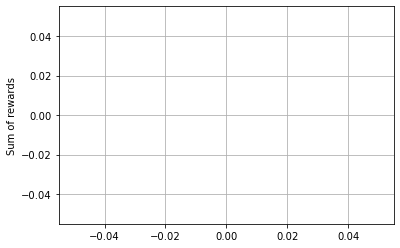

In [14]:
import matplotlib.pyplot as plt
plt.plot(p1.sum_of_qvalues)
plt.ylabel('Sum of rewards')
plt.grid(True)
plt.savefig("Graph.png")
plt.show()

In [15]:
p1.savePolicy()

In [16]:
p1.loadPolicy("policy_p1")

In [17]:
p1 = Agent("computer", epsilon=0)
p1.loadPolicy("policy_p1")

p2 = Human("human")

st = State(p1, p2)
st.playwithHuman()

AttributeError: 'State' object has no attribute 'availablePosition'

In [21]:
import random


class TicTacToe:
    def __init__(self, playerX, playerO):
        self.board = [' ']*9
        self.playerX, self.playerO = playerX, playerO
        self.playerX_turn = random.choice([True, False])

    def play_game(self):
        self.playerX.start_game('X')
        self.playerO.start_game('O')
        while True: #yolo
            if self.playerX_turn:
                player, char, other_player = self.playerX, 'X', self.playerO
            else:
                player, char, other_player = self.playerO, 'O', self.playerX
            if player.breed == "human":
                self.display_board()
            space = player.move(self.board)
            if self.board[space-1] != ' ': # illegal move
                player.reward(-99, self.board) # score of shame
                break
            self.board[space-1] = char
            if self.player_wins(char):
                player.reward(1, self.board)
                other_player.reward(-1, self.board)
                break
            if self.board_full(): # tie game
                player.reward(0.5, self.board)
                other_player.reward(0.5, self.board)
                break
            other_player.reward(0, self.board)
            self.playerX_turn = not self.playerX_turn

    def player_wins(self, char):
        for a,b,c in [(0,1,2), (3,4,5), (6,7,8),
                      (0,3,6), (1,4,7), (2,5,8),
                      (0,4,8), (2,4,6)]:
            if char == self.board[a] == self.board[b] == self.board[c]:
                return True
        return False

    def board_full(self):
        return not any([space == ' ' for space in self.board])

    def display_board(self):
        row = " {} | {} | {}"
        hr = "\n-----------\n"
        print(row + hr + row + hr + row)#.format(*self.board)


class Player(object):
    def __init__(self):
        self.breed = "human"

    def start_game(self, char):
        print("\nNew game!")

    def move(self, board):
        return int(input("Your move? "))

    def reward(self, value, board):
        print("{} rewarded: {}".format(self.breed, value))

    def available_moves(self, board):
        return [i+1 for i in range(0,9) if board[i] == ' ']


class RandomPlayer(Player):
    def __init__(self):
        self.breed = "random"

    def reward(self, value, board):
        pass

    def start_game(self, char):
        pass

    def move(self, board):
        return random.choice(self.available_moves(board))


class MinimaxPlayer(Player):
    def __init__(self):
        self.breed = "minimax"
        self.best_moves = {}

    def start_game(self, char):
        self.me = char
        self.enemy = self.other(char)

    def other(self, char):
        return 'O' if char == 'X' else 'X'

    def move(self, board):
        if tuple(board) in self.best_moves:
            return random.choice(self.best_moves[tuple(board)])
        if len(self.available_moves(board)) == 9:
            return random.choice([1,3,7,9])
        best_yet = -2
        choices = []
        for move in self.available_moves(board):
            board[move-1] = self.me
            optimal = self.minimax(board, self.enemy, -2, 2)
            board[move-1] = ' '
            if optimal > best_yet:
                choices = [move]
                best_yet = optimal
            elif optimal == best_yet:
                choices.append(move)
        self.best_moves[tuple(board)] = choices
        return random.choice(choices)

    def minimax(self, board, char, alpha, beta):
        if self.player_wins(self.me, board):
            return 1
        if self.player_wins(self.enemy, board):
            return -1
        if self.board_full(board):
            return 0
        for move in self.available_moves(board):
            board[move-1] = char
            val = self.minimax(board, self.other(char), alpha, beta)
            board[move-1] = ' '
            if char == self.me:
                if val > alpha:
                    alpha = val
                if alpha >= beta:
                    return beta
            else:
                if val < beta:
                    beta = val
                if beta <= alpha:
                    return alpha
        if char == self.me:
            return alpha
        else:
            return beta

    def player_wins(self, char, board):
        for a,b,c in [(0,1,2), (3,4,5), (6,7,8),
                      (0,3,6), (1,4,7), (2,5,8),
                      (0,4,8), (2,4,6)]:
            if char == board[a] == board[b] == board[c]:
                return True
        return False

    def board_full(self, board):
        return not any([space == ' ' for space in board])

    def reward(self, value, board):
        pass


class MinimuddledPlayer(MinimaxPlayer):
    def __init__(self, confusion=0.1):
        super(MinimuddledPlayer, self).__init__()
        self.breed = "muddled"
        self.confusion = confusion
        self.ideal_player = MinimaxPlayer()

    def start_game(self, char):
        self.ideal_player.me = char
        self.ideal_player.enemy = self.other(char)

    def move(self, board):
        if random.random() > self.confusion:
            return self.ideal_player.move(board)
        else:
            return random.choice(self.available_moves(board))


class QLearningPlayer(Player):
    def __init__(self, epsilon=0.2, alpha=0.3, gamma=0.9):
        self.breed = "Qlearner"
        self.harm_humans = False
        self.q = {} # (state, action) keys: Q values
        self.epsilon = epsilon # e-greedy chance of random exploration
        self.alpha = alpha # learning rate
        self.gamma = gamma # discount factor for future rewards

    def start_game(self, char):
        self.last_board = (' ',)*9
        self.last_move = None

    def getQ(self, state, action):
        # encourage exploration; "optimistic" 1.0 initial values
        if self.q.get((state, action)) is None:
            self.q[(state, action)] = 1.0
        return self.q.get((state, action))

    def move(self, board):
        self.last_board = tuple(board)
        actions = self.available_moves(board)

        if random.random() < self.epsilon: # explore!
            self.last_move = random.choice(actions)
            return self.last_move

        qs = [self.getQ(self.last_board, a) for a in actions]
        maxQ = max(qs)

        if qs.count(maxQ) > 1:
            # more than 1 best option; choose among them randomly
            best_options = [i for i in range(len(actions)) if qs[i] == maxQ]
            i = random.choice(best_options)
        else:
            i = qs.index(maxQ)

        self.last_move = actions[i]
        return actions[i]

    def reward(self, value, board):
        if self.last_move:
            self.learn(self.last_board, self.last_move, value, tuple(board))

    def learn(self, state, action, reward, result_state):
        prev = self.getQ(state, action)
        maxqnew = max([self.getQ(result_state, a) for a in self.available_moves(state)])
        self.q[(state, action)] = prev + self.alpha * ((reward + self.gamma*maxqnew) - prev)


# p1 = RandomPlayer()
# p1 = MinimaxPlayer()
# p1 = MinimuddledPlayer()
p1 = QLearningPlayer()
p2 = QLearningPlayer()

for i in range(0,2):
    t = TicTacToe(p1, p2)
    t.play_game()

p1 = Player()
p2.epsilon = 0

while True:
    t = TicTacToe(p1, p2)
    t.play_game()


New game!
 {} | {} | {}
-----------
 {} | {} | {}
-----------
 {} | {} | {}
Your move? 4
human rewarded: 0
 {} | {} | {}
-----------
 {} | {} | {}
-----------
 {} | {} | {}
Your move? 6
human rewarded: 0
 {} | {} | {}
-----------
 {} | {} | {}
-----------
 {} | {} | {}
Your move? 8
human rewarded: 0
 {} | {} | {}
-----------
 {} | {} | {}
-----------
 {} | {} | {}
Your move? 5
human rewarded: 1

New game!
 {} | {} | {}
-----------
 {} | {} | {}
-----------
 {} | {} | {}
Your move? 2
human rewarded: 0
 {} | {} | {}
-----------
 {} | {} | {}
-----------
 {} | {} | {}
Your move? 1
human rewarded: -99

New game!
human rewarded: 0
 {} | {} | {}
-----------
 {} | {} | {}
-----------
 {} | {} | {}
Your move? 6
human rewarded: 0
 {} | {} | {}
-----------
 {} | {} | {}
-----------
 {} | {} | {}
Your move? 8
human rewarded: 0
 {} | {} | {}
-----------
 {} | {} | {}
-----------
 {} | {} | {}
Your move? 8
human rewarded: -99

New game!
 {} | {} | {}
-----------
 {} | {} | {}
-----------
 {} | {} 

ValueError: invalid literal for int() with base 10: '00\\'

In [19]:
class QLearningPlayer(Player):
    def __init__(self, epsilon=0.2, alpha=0.3, gamma=0.9):
        self.breed = "Qlearner"
        self.harm_humans = False
        self.q = {} # (state, action) keys: Q values
        self.epsilon = epsilon # e-greedy chance of random exploration
        self.alpha = alpha # learning rate
        self.gamma = gamma # discount factor for future rewards

    def start_game(self, char):
        self.last_board = (' ',)*9
        self.last_move = None

    def getQ(self, state, action):
        # encourage exploration; "optimistic" 1.0 initial values
        if self.q.get((state, action)) is None:
            self.q[(state, action)] = 1.0
        return self.q.get((state, action))

    def move(self, board):
        self.last_board = tuple(board)
        actions = self.available_moves(board)

        if random.random() < self.epsilon: # explore!
            self.last_move = random.choice(actions)
            return self.last_move

        qs = [self.getQ(self.last_board, a) for a in actions]
        maxQ = max(qs)

        if qs.count(maxQ) > 1:
            # more than 1 best option; choose among them randomly
            best_options = [i for i in range(len(actions)) if qs[i] == maxQ]
            i = random.choice(best_options)
        else:
            i = qs.index(maxQ)

        self.last_move = actions[i]
        return actions[i]

    def reward(self, value, board):
        if self.last_move:
            self.learn(self.last_board, self.last_move, value, tuple(board))

    def learn(self, state, action, reward, result_state):
        prev = self.getQ(state, action)
        maxqnew = max([self.getQ(result_state, a) for a in self.available_moves(state)])
        self.q[(state, action)] = prev + self.alpha * ((reward + self.gamma*maxqnew) - prev)

In [20]:
p1 = QLearningPlayer()
p2 = QLearningPlayer()

for i in range(0,2):
    t = TicTacToe(p1, p2)
    t.play_game()

p1 = Player()
p2.epsilon = 0

while True:
    t = TicTacToe(p1, p2)
    t.play_game()


New game!
human rewarded: 0
 {} | {} | {}
-----------
 {} | {} | {}
-----------
 {} | {} | {}


NameError: name 'raw_input' is not defined